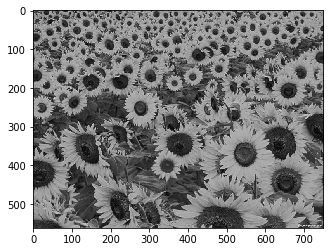

In [5]:
import cv2
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("sunflower.tiff",0)
from scipy import ndimage
from scipy.ndimage import filters
from scipy import spatial
k = 1.414
sigma = 1.0
img = img/255.0
imshow(img,cmap="gray")

In [6]:
def LoG(sigma):
    #window size 
    n = np.ceil(sigma*6)
    y,x = np.ogrid[-n//2:n//2+1,-n//2:n//2+1]
    y_filter = np.exp(-(y*y/(2.*sigma*sigma)))
    x_filter = np.exp(-(x*x/(2.*sigma*sigma)))
    final_filter = (-(2*sigma**2) + (x*x + y*y) ) * (x_filter*y_filter) * (1/(2*np.pi*sigma**4))
    return final_filter

In [7]:
def LoG_convolve(img):
    log_images = []
    for i in range(0,9):
        y = np.power(k,i)
        sigma_1 = sigma*y
        filter_log = LoG(sigma_1)
        image = cv2.filter2D(img,-1,filter_log)
        image = np.pad(image,((1,1),(1,1)),'constant')
        image = np.square(image)
        log_images.append(image)
    log_image_np = np.array([i for i in log_images])
    return log_image_np
log_image_np = LoG_convolve(img)
print(log_image_np.shape)

(9, 564, 752)


In [25]:
def detect_blob(log_image_np):
    co_ordinates = [] #to store co ordinates
    (h,w) = img.shape
    for i in range(1,h):
        for j in range(1,w):
            slice_img = log_image_np[:,i-1:i+2,j-1:j+2] #9*3*3 slice
            result = np.amax(slice_img) #finding maximum
            if result >= 0.05: #threshold
                z,x,y = np.unravel_index(slice_img.argmax(),slice_img.shape)
                co_ordinates.append((i+x-1,j+y-1,k**z*sigma)) #finding co-rdinates
    return co_ordinates
co_ordinates = list(set(detect_blob(log_image_np)))

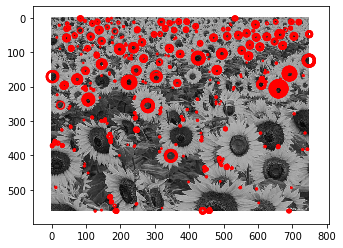

In [26]:
fig, ax = plt.subplots()
nh,nw = img.shape
count = 0
ax.imshow(img, interpolation='nearest',cmap="gray")
for blob in co_ordinates:
    y,x,r = blob
    c = plt.Circle((x, y), r*1.414, color='red', linewidth=1.5, fill=False)
    ax.add_patch(c)
ax.plot()  
plt.show()

In [27]:
len(co_ordinates)

2258